In [28]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns   
import warnings 
warnings.filterwarnings('ignore')


In [29]:
df=pd.read_csv('..\data\diabetes.csv')
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [30]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:

df['Glucose'].replace(0,df['Glucose'].mean(),inplace=True)
df['BloodPressure'].replace(0,df['BloodPressure'].mean(),inplace=True)
df['SkinThickness'].replace(0,df['SkinThickness'].mean(),inplace=True)
df['Insulin'].replace(0,df['Insulin'].mean(),inplace=True)
df['BMI'].replace(0,df['BMI'].mean(),inplace=True)

<Axes: >

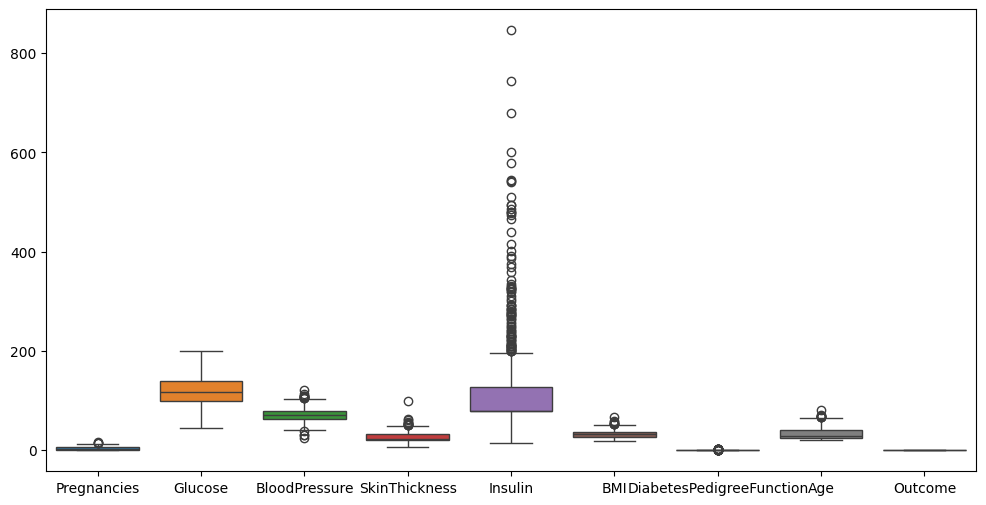

In [7]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler

scaler=StandardScaler()

X_train,X_test,y_train,y_test=train_test_split(df.drop('Outcome',axis=1),df['Outcome'],test_size=0.25,random_state=0)

In [9]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

<Axes: >

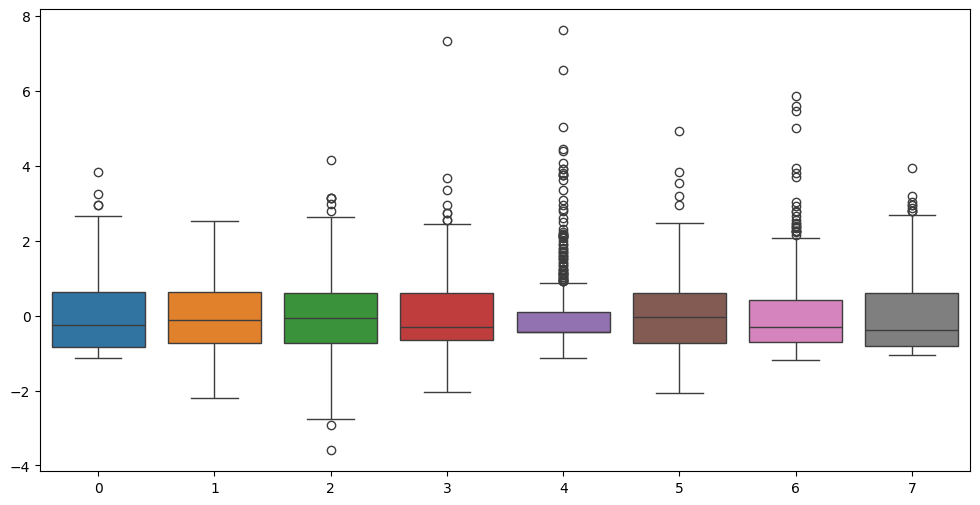

In [10]:
plt.figure(figsize=(12,6))
sns.boxplot(data=X_train_scaled)

In [11]:
import pickle 

pickle.dump(scaler,open('..\models\scaler.pkl','wb'))

In [12]:
from sklearn.model_selection import  GridSearchCV
from sklearn.linear_model import LogisticRegression

In [13]:
Parameter={
    'C':np.logspace(-3,3,7),
    'penalty':['l1','l2'],
    'solver':['newton-cg', 'lbfgs', 'liblinear']
}

In [14]:
l_reg=LogisticRegression()
grid=GridSearchCV(l_reg,Parameter,scoring='accuracy',cv=10)

In [15]:
grid.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [16]:
c,penalty,solver=grid.best_params_.values()

In [17]:
log_reg=LogisticRegression(C=c,penalty=penalty,solver=solver)

In [18]:
log_reg.fit(X_train_scaled,y_train)
print("Score :",log_reg.score(X_test_scaled,y_test))
y_pred=log_reg.predict(X_test_scaled)

Score : 0.796875


In [19]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print("Classification Report : \n",classification_report(y_test,y_pred))
print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred))
print("Accuracy Score : ",accuracy_score(y_test,y_pred))



Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       130
           1       0.73      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.75       192
weighted avg       0.79      0.80      0.79       192

Confusion Matrix : 
 [[117  13]
 [ 26  36]]
Accuracy Score :  0.796875


In [20]:
pickle.dump(log_reg,open('..\models\log_reg.pkl','wb'))

In [27]:
model1=pickle.loads(open('..\models\log_reg.pkl','rb').read())

In [28]:
model1.predict(X_test_scaled)

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0])

In [29]:

uri = "mongodb+srv://saksham:<password>@cluster1.vucvhcs.mongodb.net/?retryWrites=true&w=majority&appName=Cluster1"
import pymongo
client = pymongo.MongoClient(uri)
db = client["diabetes"]



In [30]:
collection= db['login']

In [31]:
collection.insert_one({'username':"xyz",'password':"xyz"})

InsertOneResult(ObjectId('66f566911f983b9557434904'), acknowledged=True)

In [33]:
user='xyz1'
pas = collection.find_one({'username':user})
pas['password']

TypeError: 'NoneType' object is not subscriptable

In [30]:
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()


In [31]:
nb.fit(X_train_scaled,y_train)

GaussianNB()

In [33]:
y_pred=nb.predict(X_test_scaled)

In [34]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("Classification Report : \n",classification_report(y_test,y_pred))
print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred))
print("Accuracy Score : ",accuracy_score(y_test,y_pred))


Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       130
           1       0.66      0.53      0.59        62

    accuracy                           0.76       192
   macro avg       0.73      0.70      0.71       192
weighted avg       0.75      0.76      0.75       192

Confusion Matrix : 
 [[113  17]
 [ 29  33]]
Accuracy Score :  0.7604166666666666


In [35]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train_scaled,y_train)

SVC()

In [36]:
y_pred=scv.predict(X_test_scaled)

In [38]:
print("Classification Report : \n",classification_report(y_test,y_pred))
print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred))
print("Accuracy Score : ",accuracy_score(y_test,y_pred))


Classification Report : 
               precision    recall  f1-score   support

           0       0.78      0.88      0.83       130
           1       0.67      0.48      0.56        62

    accuracy                           0.76       192
   macro avg       0.72      0.68      0.70       192
weighted avg       0.74      0.76      0.74       192

Confusion Matrix : 
 [[115  15]
 [ 32  30]]
Accuracy Score :  0.7552083333333334


In [27]:
print("\U0001F613","\U0001F647")

😓 🙇
